Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6

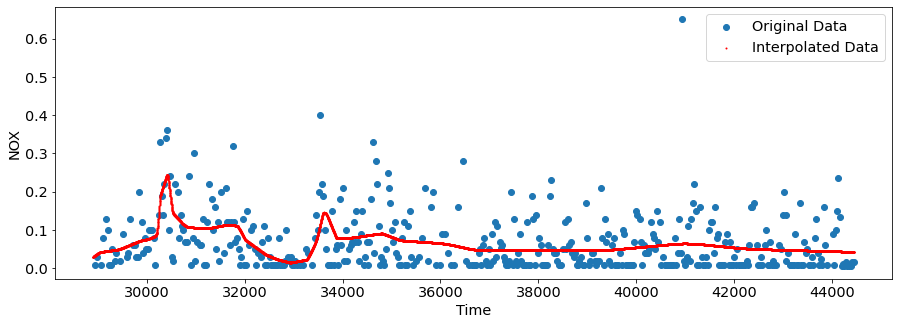

313/313 [==============================] - 0s 385us/step - loss: 3.2331e-17
['loss']


In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation//NOX/saved_model/my_modelBB02_NOX')
# Check its architecture
model.summary()

df = pd.read_csv("E:/1 My Project/Interpolated data/NOX_data/BB02.csv")
time = df['time'].values
NOX = df['NOX'].values
df

#Transform the normalized scale to real scale
NOX_min = 0.005
NOX_max = 0.65
time_min = 28933.49                 
time_max = 44452.51                     

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(NOX_max - NOX_min) + NOX_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, NOX*(NOX_max - NOX_min) + NOX_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('NOX')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [2]:
interpolation = model.predict([0.421000041
,0.424801828
,0.428732489
,0.432663151
,0.436593812
,0.440524473
,0.444519571
,0.448321358
,0.45225202
,0.456182681
,0.460113342
,0.464044003
,0.468039102
,0.471840889
,0.47577155
,0.479702211
,0.48169976
,0.483632872
,0.487563534
,0.491558632
,0.495424856
,0.503286179
,0.869997541
,0.899445282
,0.966137649
,0.968070761
,0.97006831
])
interpolation

array([[0.10161133],
       [0.10084899],
       [0.10006081],
       [0.09927265],
       [0.09848447],
       [0.09769629],
       [0.09675601],
       [0.09574493],
       [0.0946996 ],
       [0.09365426],
       [0.09224863],
       [0.09042513],
       [0.0883743 ],
       [0.08619267],
       [0.08354783],
       [0.08087616],
       [0.07952814],
       [0.07822596],
       [0.0755781 ],
       [0.07288544],
       [0.07036602],
       [0.06767897],
       [0.07094277],
       [0.06787962],
       [0.0621606 ],
       [0.06197068],
       [0.06177445]], dtype=float32)